In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_calc = pd.read_csv('../result/other.txt',sep=' ', index_col=False,header=None)

In [3]:
# data_calc.N += 1
data_calc

,0,1,2,3,4,5,6,7
0,-2.01082,-1.454550e-01,6.349360e+05,1.451260e+05,6.349320e+05,1.451260e+05,2.016070e+00,7.800590e+05
1,-4.01119,-3.337360e-01,1.593200e+06,3.596400e+05,1.593180e+06,3.596400e+05,4.025050e+00,1.952820e+06
2,-3.90658,-1.111670e+00,2.130790e+06,5.001290e+05,2.130770e+06,5.001280e+05,4.061670e+00,2.630900e+06
3,7.23139,-1.097170e+00,5.721910e+07,2.001380e+06,5.721900e+07,2.001370e+06,7.314150e+00,5.922040e+07
4,11.03330,-3.597770e-01,6.093500e+07,2.180950e+06,6.093490e+07,2.180950e+06,1.103920e+01,6.311580e+07
...,...,...,...,...,...,...,...,...
999995,458473.00000,-2.777830e+06,2.768690e+18,2.791870e+18,2.768690e+18,2.791860e+18,2.815410e+06,5.560550e+18
999996,458471.00000,-2.777830e+06,2.768690e+18,2.791870e+18,2.768690e+18,2.791860e+18,2.815410e+06,5.560550e+18
999997,458470.00000,-2.777830e+06,2.768690e+18,2.791870e+18,2.768690e+18,2.791860e+18,2.815410e+06,5.560550e+18
999998,458469.00000,-2.777830e+06,2.768690e+18,2.791870e+18,2.768690e+18,2.791860e+18,2.815410e+06,5.560550e+18


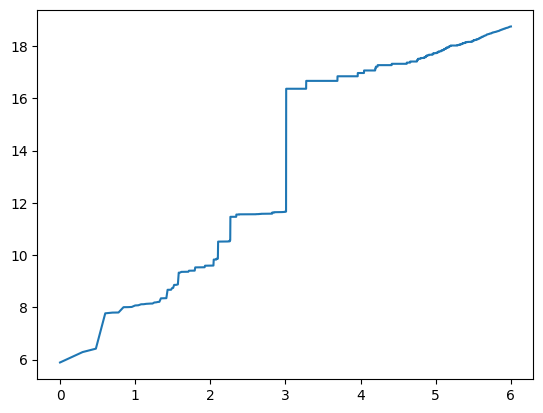

In [4]:
x = np.linspace(1, len(data_calc[7]), num=len(data_calc[7]))  
y = data_calc[7]
plt.plot(np.log10(x),np.log10(y))

## Апроксимация

In [5]:
x = np.log10(np.linspace(1, len(data_calc[7]), num=len(data_calc[7])))  
y = np.log10(data_calc[7])

In [6]:
lg_mu = (y.mean()*(x**2).mean() - (x*y).mean()*x.mean())/((x**2).mean() - x.mean()**2)
mu = 10**lg_mu
print(f'lg_mu: {lg_mu}, mu: {mu}')

lg_mu: 12.663359446344494, mu: 4606376652860.904


In [7]:
nu = ((x*y).mean() - y.mean()*x.mean())/((x**2).mean() - x.mean()**2)
print(f'nu: {nu}')

nu: 1.0142871842158756


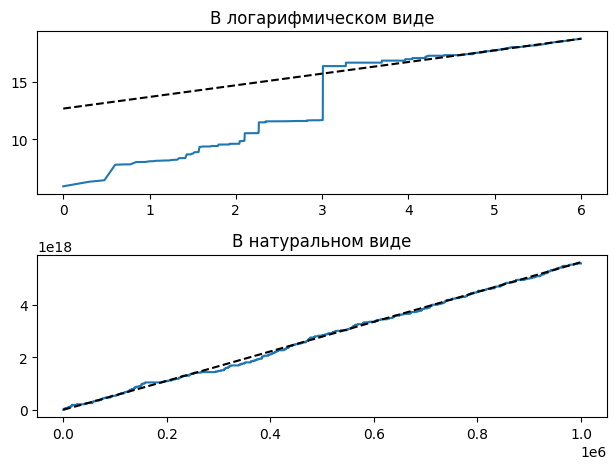

In [8]:
plt.figure()

plt.subplot(2, 1, 1) 

x = np.log10(np.linspace(1, len(data_calc[7]), num=len(data_calc[7])))  
y = np.log10(data_calc[7])
plt.title('В логарифмическом виде')
plt.plot(x, y)
plt.plot(x, lg_mu + nu * x,'k--', label='Аппроксимация')

plt.subplot(2, 1, 2) 
x = np.linspace(1, len(data_calc[7]), num=len(data_calc[7]))  
y = data_calc[7]
plt.title('В натуральном виде')
plt.plot(x, y)
plt.plot(x, mu*(x**nu),'k--', label='Аппроксимация')

plt.tight_layout() 
plt.show()

In [14]:
data_first_particle = pd.read_csv('../result/trajectory.txt',sep=' ', index_col=False,header=None)

In [15]:
data_first_particle

,0,1
0,5.215510e+00,0.000
1,5.215510e+00,-161.292
2,5.215510e+00,-160.423
3,5.215510e+00,-169.722
4,-3.493200e+02,-169.722
...,...,...
999995,-1.225070e+06,-1191270.000
999996,-1.225070e+06,-1191270.000
999997,-1.225070e+06,-1191270.000
999998,-1.225070e+06,-1191270.000


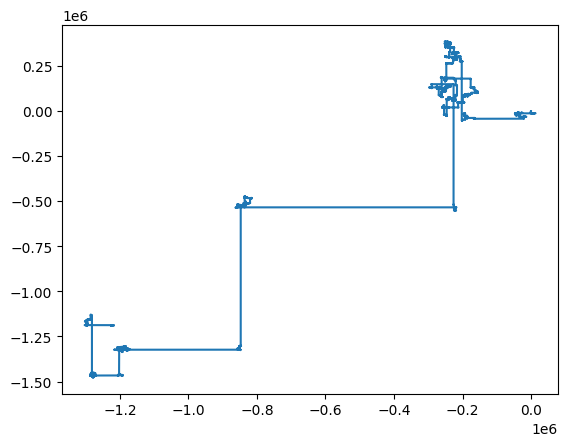

In [16]:
plt.plot(data_first_particle[0],data_first_particle[1])

In [19]:
data_last_vals = pd.read_csv('../result/result.txt',sep=' ', index_col=False, header=None)

In [20]:
data_last_vals

,0,1
0,-1225080.0,-1191270.0
1,301971.0,-2026390.0
2,1137080.0,16870.8
3,-719956.0,2973040.0
4,1815710.0,-1809720.0
...,...,...
499995,-2034190.0,-571307.0
499996,1875640.0,-204443.0
499997,-2177470.0,-887277.0
499998,148642.0,24480.5


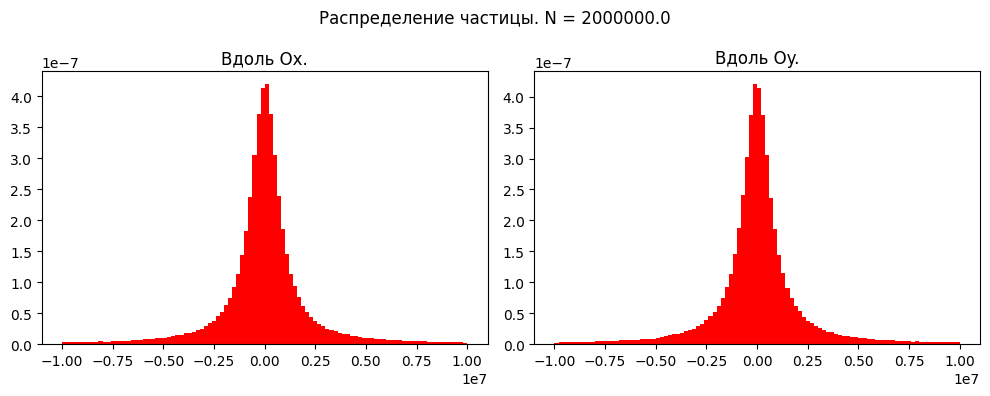

In [21]:
bin_cnt = 100
bin_w = 1/bin_cnt
_idx = 9
plt.figure(figsize=(10, 4))
plt.suptitle(f'Раcпределение частицы. N = {2e6}')

plt.subplot(1,2,1)
plt.hist(data_last_vals[0], bin_cnt, facecolor='r', density=True, label='E(X)', range=(-1e7, 1e7))
plt.title(f'Вдоль Ox.')

plt.subplot(1,2,2)
plt.hist(data_last_vals[1], bin_cnt, facecolor='r', density=True, label='E(X)', range=(-1e7, 1e7))
plt.title(f'Вдоль Oy.')

plt.tight_layout()
plt.show()